In [1]:
!nvidia-smi

Mon Sep 11 09:29:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
ROOT="/content/drive/MyDrive/FSDS2.0/ANN_Regression"
os.chdir(ROOT)
os.getcwd()

'/content/drive/MyDrive/FSDS2.0/ANN_Regression'

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y=pd.DataFrame(housing.target,columns=['price'])
y.head()

,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
X.shape, y.shape

((20640, 8), (20640, 1))

In [21]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.30,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=32)

In [23]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(y_valid.shape)

(14448, 8)
(6192, 8)
(10836, 8)
(3612, 1)


In [24]:
LAYERS=[
    tf.keras.layers.Dense(30,activation='relu',input_shape=X_train_full.shape[1:]),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1)
]

In [25]:
model=tf.keras.models.Sequential(LAYERS)

In [32]:
# For calculating accuracy score (r2 score)
# from keras import backend as k
from keras import backend as K

def coeff_determination(y_true,y_pred):
  SS_res=K.sum(K.square(y_true-y_pred))
  SS_tot=K.sum(K.square(y_true-K.mean(y_true)))
  return(1-SS_res/(SS_tot+K.epsilon()))


In [33]:
LOSS='mse'
OPTIMIZER='sgd'

model.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=[coeff_determination])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                270       
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [36]:
EPOCHS=15

history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_valid,y_valid))

Epoch 1/15
339/339 [==============================] - 7s 5ms/step - loss: 1.0323 - coeff_determination: 0.1982 - val_loss: 0.6081 - val_coeff_determination: 0.5264
Epoch 2/15
339/339 [==============================] - 1s 4ms/step - loss: 0.5256 - coeff_determination: 0.5867 - val_loss: 0.5078 - val_coeff_determination: 0.6015
Epoch 3/15
339/339 [==============================] - 2s 5ms/step - loss: 0.4634 - coeff_determination: 0.6356 - val_loss: 0.4527 - val_coeff_determination: 0.6458
Epoch 4/15
339/339 [==============================] - 2s 5ms/step - loss: 0.4381 - coeff_determination: 0.6553 - val_loss: 0.4345 - val_coeff_determination: 0.6600
Epoch 5/15
339/339 [==============================] - 1s 4ms/step - loss: 0.4234 - coeff_determination: 0.6667 - val_loss: 0.4397 - val_coeff_determination: 0.6574
Epoch 6/15
339/339 [==============================] - 2s 5ms/step - loss: 0.4137 - coeff_determination: 0.6689 - val_loss: 0.3991 - val_coeff_determination: 0.6872
Epoch 7/15
339/3

In [37]:
pd.DataFrame(history.history)

,loss,coeff_determination,val_loss,val_coeff_determination
0,1.032289,0.198237,0.608125,0.526387
1,0.525588,0.586713,0.507781,0.601467
2,0.463401,0.635597,0.452728,0.645783
3,0.438135,0.655318,0.434488,0.660005
4,0.423380,0.666707,0.439667,0.657449
5,0.413683,0.668931,0.399091,0.687220
6,0.403353,0.675414,0.390648,0.692606
7,0.394506,0.688493,0.464949,0.625820
8,0.388485,0.692912,0.396146,0.686994
9,0.381367,0.697194,0.378146,0.700595


<Axes: >

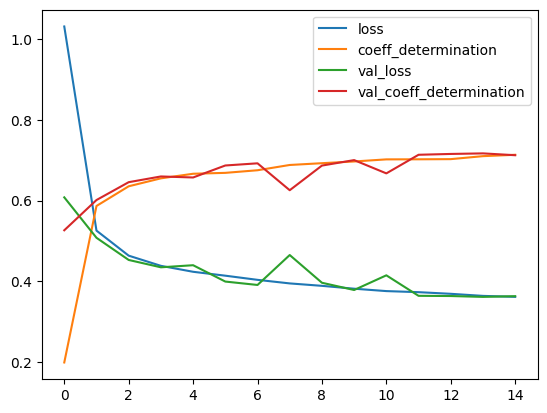

In [39]:
pd.DataFrame(history.history).plot()

In [41]:
model.evaluate(X_test,y_test)

194/194 [==============================] - 1s 4ms/step - loss: 0.3685 - coeff_determination: 0.6938


[0.3685041069984436, 0.6938489079475403]

In [42]:
X_test.shape

(6192, 8)

In [44]:
new=X_test[0]
new, new.shape

(array([-1.15418193, -0.28796068, -0.55711726, -0.17956467, -0.02632688,
         0.06830989,  0.19815802,  0.28100916]),
 (8,))

In [45]:
new.reshape(1,8)

array([[-1.15418193, -0.28796068, -0.55711726, -0.17956467, -0.02632688,
         0.06830989,  0.19815802,  0.28100916]])

In [46]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 102ms/step


array([[0.92796236]], dtype=float32)